In [1]:
from run_metrics import run_all_metrics
import torch
import plotly.graph_objects as go

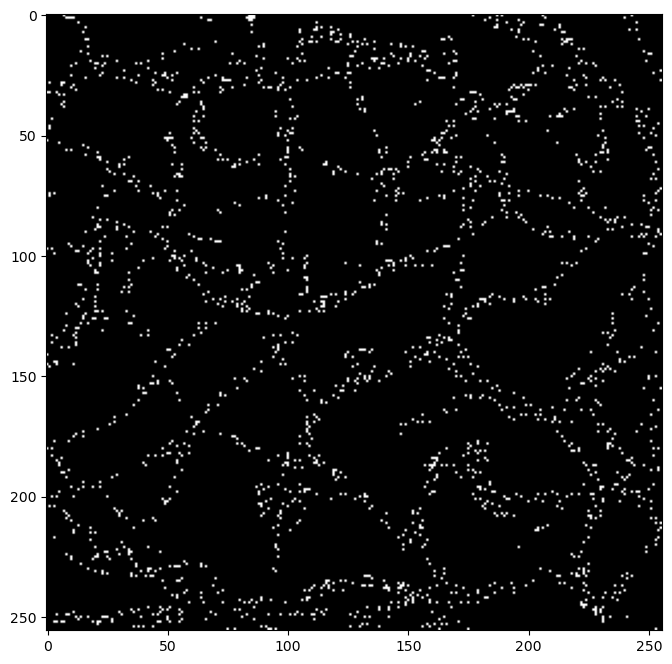

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from PIL import Image

from noise_generator import create_noisy_img

img = np.array(Image.open("4909.png"))//255

spike_p = 0
fp_p = 0
fp_comp_threshold = 0
fn_p = 0.9
fn_comp_threshold = 9

img_noise = create_noisy_img(img, spike_p, fp_p, fp_comp_threshold, fn_p, fn_comp_threshold)

plt.figure(figsize=(8,8))
plt.imshow(img_noise, "gray")


In [3]:
img_noise_bin = np.where(img_noise == True, 1, 0)
img_noise_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 1]])

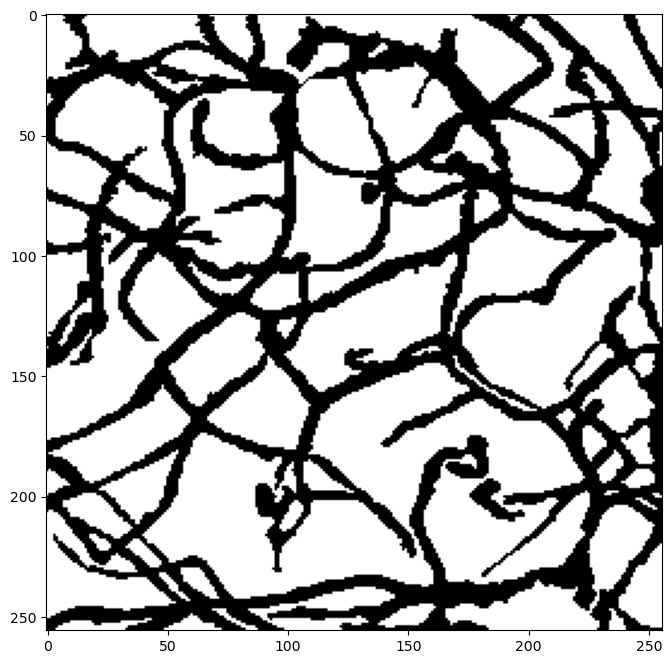

In [4]:
img_zeros = np.zeros((256,256))
img_ones = np.ones((256,256))
img_inverted = np.where(img == 1, 0, 1)
plt.figure(figsize=(8,8))
plt.imshow(img_inverted, "gray")


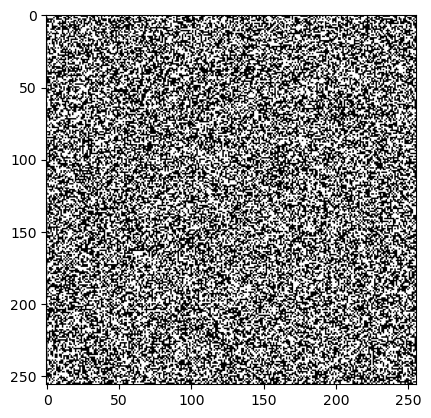

In [5]:
img_rand = np.random.randint(0,2,(256,256))
plt.imshow(img_rand, "gray")
plt.show()

In [6]:
inverted = torch.from_numpy(img_inverted)
zeros = torch.from_numpy(img_zeros)
ones = torch.from_numpy(img_ones)
img_rand = torch.from_numpy(img_rand)
img_tensor = torch.from_numpy(img)
img_noise_tensor = torch.from_numpy(img_noise)
noise_metrics = run_all_metrics(img_noise_tensor, img_tensor)
inverted_metrics = run_all_metrics(inverted, img_tensor)
zeros_metrics = run_all_metrics(zeros, img_tensor)
ones_metrics = run_all_metrics(ones, img_tensor)
random_metrics = run_all_metrics(img_rand, img_tensor)

/media/ivancalvo/Linux/Mestrado/reps/metricas/topology_metrics.py:62: RuntimeWarning: invalid value encountered in scalar divide
  score = 2*tprec*tsens/(tprec+tsens)
/media/ivancalvo/Linux/Mestrado/reps/metricas/topology_metrics.py:59: RuntimeWarning: invalid value encountered in scalar divide
  tprec = (pred_skel & target).sum()/pred_skel.sum()
/media/ivancalvo/Linux/Mestrado/reps/metricas/distance_metrics.py:375: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(distances_pred_to_gt * surfel_areas_pred) /
/media/ivancalvo/Linux/Mestrado/reps/metricas/distance_metrics.py:451: RuntimeWarning: invalid value encountered in scalar divide
  np.sum(surfel_areas_pred[distances_pred_to_gt <= tolerance_mm]) /


In [7]:
#pred_skel, target_skel = noise_metrics["clDice"][1:]

In [8]:
# fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# # Plot the first array
# axs[0].imshow(pred_skel, cmap='gray')
# axs[0].set_title('Array 1')

# # Plot the second array
# axs[1].imshow(np.transpose(target_skel, (1,2,0)), cmap='gray')
# axs[1].set_title('Array 2')

# # Remove axes if you want
# for ax in axs:
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [9]:
metrics = ["Acc", "iou", "precision", "reccal", "dice"] 
names = ["inverted", "ones", "zeros", "random"]

fig = go.Figure(data=[
    go.Bar(name="random", x=metrics, y=random_metrics["confusionMatrixMetrics"]),
    go.Bar(name='Inverted', x=metrics, y=inverted_metrics["confusionMatrixMetrics"]),
    go.Bar(name='ones', x=metrics, y=ones_metrics["confusionMatrixMetrics"]),
    go.Bar(name='zeros', x=metrics, y=zeros_metrics["confusionMatrixMetrics"])
])

fig.update_layout(
    barmode='group',
    title='Model Comparison Across Metrics',
    xaxis_title='Metric',
    yaxis_title='Score',
    yaxis=dict(range=[0, 1])
)

fig.show()

In [10]:
metrics_dict = {}
metrics_dict["cldice"] = []
metrics_dict["acc"] = []
metrics_dict["iou"] = []
metrics_dict["prec"] = []
metrics_dict["rec"] = []
metrics_dict["dice"] = []

for s in np.arange(0, 1, 0.1):
    img_noise = create_noisy_img(img, s, 0, 0, 0, 0)
    img_noise_bin = np.where(img_noise == True, 1, 0)
    img_tensor = torch.from_numpy(img)
    img_nois_tensor = torch.from_numpy(img_noise_bin)
    metrics = run_all_metrics(img_nois_tensor, img_tensor)
    metrics_dict['cldice'].append(metrics["clDice"])
    metrics_dict["acc"].append(metrics["confusionMatrixMetrics"][0])
    metrics_dict["iou"].append(metrics["confusionMatrixMetrics"][1])
    metrics_dict["prec"].append(metrics["confusionMatrixMetrics"][2])
    metrics_dict["rec"].append(metrics["confusionMatrixMetrics"][3])
    metrics_dict["dice"].append(metrics["confusionMatrixMetrics"][4])

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["cldice"], mode='lines+markers', name="clDice"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["acc"], mode='lines+markers', name="acc"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["iou"], mode='lines+markers', name="iou"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["prec"], mode='lines+markers', name="precision"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["rec"], mode='lines+markers', name="recall"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["dice"], mode='lines+markers', name="dice"))


fig.update_layout(
    xaxis_title='spike_p',
    yaxis_title='metric'
)

fig.show()    

In [12]:
metrics_dict = {}
metrics_dict["cldice"] = []
metrics_dict["acc"] = []
metrics_dict["iou"] = []
metrics_dict["prec"] = []
metrics_dict["rec"] = []
metrics_dict["dice"] = []

for fp_p in np.arange(0, 1, 0.1):
    img_noise = create_noisy_img(img, 0, fp_p, 1, 0, 0)
    img_noise_bin = np.where(img_noise == True, 1, 0)
    img_tensor = torch.from_numpy(img)
    img_nois_tensor = torch.from_numpy(img_noise_bin)
    metrics = run_all_metrics(img_nois_tensor, img_tensor)
    metrics_dict['cldice'].append(metrics["clDice"])
    metrics_dict["acc"].append(metrics["confusionMatrixMetrics"][0])
    metrics_dict["iou"].append(metrics["confusionMatrixMetrics"][1])
    metrics_dict["prec"].append(metrics["confusionMatrixMetrics"][2])
    metrics_dict["rec"].append(metrics["confusionMatrixMetrics"][3])
    metrics_dict["dice"].append(metrics["confusionMatrixMetrics"][4])

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["cldice"], mode='lines+markers', name="clDice"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["acc"], mode='lines+markers', name="acc"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["iou"], mode='lines+markers', name="iou"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["prec"], mode='lines+markers', name="precision"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["rec"], mode='lines+markers', name="recall"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["dice"], mode='lines+markers', name="dice"))

fig.update_layout(
    xaxis_title='fp_p',
    yaxis_title='metric'
)

fig.show()    

In [15]:
metrics_dict = {}
metrics_dict["cldice"] = []
metrics_dict["acc"] = []
metrics_dict["iou"] = []
metrics_dict["prec"] = []
metrics_dict["rec"] = []
metrics_dict["dice"] = []

for fn_p in np.arange(0, 1, 0.1):
    img_noise = create_noisy_img(img, 0, 0, 0, fn_p, 9)
    img_noise_bin = np.where(img_noise == True, 1, 0)
    img_tensor = torch.from_numpy(img)
    img_nois_tensor = torch.from_numpy(img_noise_bin)
    metrics = run_all_metrics(img_nois_tensor, img_tensor)
    metrics_dict['cldice'].append(metrics["clDice"])
    metrics_dict["acc"].append(metrics["confusionMatrixMetrics"][0])
    metrics_dict["iou"].append(metrics["confusionMatrixMetrics"][1])
    metrics_dict["prec"].append(metrics["confusionMatrixMetrics"][2])
    metrics_dict["rec"].append(metrics["confusionMatrixMetrics"][3])
    metrics_dict["dice"].append(metrics["confusionMatrixMetrics"][4])

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["cldice"], mode='lines+markers', name="clDice"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["acc"], mode='lines+markers', name="acc"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["iou"], mode='lines+markers', name="iou"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["prec"], mode='lines+markers', name="precision"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["rec"], mode='lines+markers', name="recall"))
fig.add_trace(go.Scatter(x=np.arange(0,1,0.1), y=metrics_dict["dice"], mode='lines+markers', name="dice"))

fig.update_layout(
    xaxis_title='fn_p',
    yaxis_title='metric'
)

fig.show()    